In [3]:
import tensorflow as tf

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1) #scale data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model = tf.keras.models.Sequential() #A basic feed-forward function
model.add(tf.keras.layers.Flatten()) #takes 28x28 and makes it 1x784

In [6]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #a simple fully-connected layers, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [7]:
# 10 units final layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer, 10 units for 10 classes. Softmax for probability distribution

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', #how to calculate 'error'
              metrics=('accuracy')) #what to track

In [11]:
model.fit(x_train, y_train, epochs=3) #train the model

Epoch 1/3
1875/1875 [==============================] - 1s 469us/step - loss: 0.2614 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 1s 467us/step - loss: 0.1043 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 1s 467us/step - loss: 0.0713 - accuracy: 0.9776


In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test) #evaluate the out of sample data with model
print(val_loss) #model's error
print(val_acc) #model's accuracy

313/313 [==============================] - 0s 289us/step - loss: 0.0963 - accuracy: 0.9715
0.09625466912984848
0.9714999794960022


In [13]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [14]:
predictions = new_model.predict(x_test)
print(predictions)

313/313 [==============================] - 0s 271us/step
[[4.48643291e-08 2.12128413e-07 2.46723607e-06 ... 9.99986291e-01
  2.93411500e-08 2.71009156e-07]
 [2.42446685e-09 2.28202800e-04 9.99755800e-01 ... 5.36023403e-09
  4.25867093e-08 1.44305276e-10]
 [2.82183009e-07 9.99625683e-01 3.36887642e-05 ... 7.54621724e-05
  7.44729186e-05 1.04998708e-06]
 ...
 [2.20361720e-08 1.26305649e-05 1.24622872e-07 ... 1.45084805e-05
  1.37315992e-05 4.97971268e-05]
 [1.66806913e-05 2.06711633e-07 4.96639302e-07 ... 7.69240785e-07
  6.20192103e-03 2.88117654e-08]
 [9.98768655e-07 1.54958393e-08 1.52693318e-07 ... 4.11006645e-11
  3.63118957e-08 6.79450218e-10]]


In [18]:
import numpy as np

print(np.argmax(predictions[1]))

2


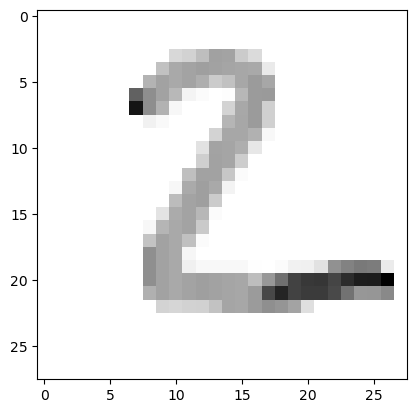

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.show()